In [1]:
# import packages
import numpy as np
import pandas as pd
from pathlib import Path

In [2]:
# load the dataset
airlines = pd.read_csv('/Users/bq/Desktop/Bootcamp/coding/Springboard/Capstone3/data/airlines.csv')
airports = pd.read_csv('/Users/bq/Desktop/Bootcamp/coding/Springboard/Capstone3/data/airports.csv')
flights = pd.read_csv('/Users/bq/Desktop/Bootcamp/coding/Springboard/Capstone3/data/flights.csv',low_memory=False)

# Data Wrangling

#### Airlines data

In [3]:
# check first few rows
airlines.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


In [4]:
# check data types
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   IATA_CODE  14 non-null     object
 1   AIRLINE    14 non-null     object
dtypes: object(2)
memory usage: 352.0+ bytes


In [5]:
# check airlines
airlines['AIRLINE'].value_counts()

United Air Lines Inc.           1
American Airlines Inc.          1
US Airways Inc.                 1
Frontier Airlines Inc.          1
JetBlue Airways                 1
Skywest Airlines Inc.           1
Alaska Airlines Inc.            1
Spirit Air Lines                1
Southwest Airlines Co.          1
Delta Air Lines Inc.            1
Atlantic Southeast Airlines     1
Hawaiian Airlines Inc.          1
American Eagle Airlines Inc.    1
Virgin America                  1
Name: AIRLINE, dtype: int64

In [6]:
# check size
airlines.shape

(14, 2)

In [7]:
# check missing values
airlines.isna().sum()

IATA_CODE    0
AIRLINE      0
dtype: int64

No missing values

Airlines data is relatively small, and no need for further data cleaning

#### Airports data

In [8]:
# check first few rows
airports.head()

,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
0,ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
1,ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
2,ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
3,ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
4,ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447


In [9]:
# check sizes
airports.shape

(322, 7)

In [10]:
# check data types
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IATA_CODE  322 non-null    object 
 1   AIRPORT    322 non-null    object 
 2   CITY       322 non-null    object 
 3   STATE      322 non-null    object 
 4   COUNTRY    322 non-null    object 
 5   LATITUDE   319 non-null    float64
 6   LONGITUDE  319 non-null    float64
dtypes: float64(2), object(5)
memory usage: 17.7+ KB


In [11]:
# check missing values
airports.isna().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     3
LONGITUDE    3
dtype: int64

There are 3 missing values for 'LATITUDE' and 'LONGITUDE'

In [12]:
# drop rows with missing values
airports = airports.dropna()

In [13]:
# check missing values again
airports.isna().sum()

IATA_CODE    0
AIRPORT      0
CITY         0
STATE        0
COUNTRY      0
LATITUDE     0
LONGITUDE    0
dtype: int64

No missing values now

#### Flights data

In [14]:
# check size
flights.shape

(5819079, 31)

It contains 5819079 rows and 31 columns

In [15]:
# check data type
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [16]:
# Check basic stats
flights.describe()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
count,5819079.0,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.819079e+06,5.732926e+06,5.732926e+06,5.730032e+06,5.730032e+06,...,5.819079e+06,5.726566e+06,5.714008e+06,5.819079e+06,5.819079e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06,1.063439e+06
mean,2015.0,6.524085e+00,1.570459e+01,3.926941e+00,2.173093e+03,1.329602e+03,1.335204e+03,9.370158e+00,1.607166e+01,1.357171e+03,...,1.493808e+03,1.476491e+03,4.407057e+00,2.609863e-03,1.544643e-02,1.348057e+01,7.615387e-02,1.896955e+01,2.347284e+01,2.915290e+00
std,0.0,3.405137e+00,8.783425e+00,1.988845e+00,1.757064e+03,4.837518e+02,4.964233e+02,3.708094e+01,8.895574e+00,4.980094e+02,...,5.071647e+02,5.263197e+02,3.927130e+01,5.102012e-02,1.233201e-01,2.800368e+01,2.143460e+00,4.816164e+01,4.319702e+01,2.043334e+01
min,2015.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-8.200000e+01,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,-8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2015.0,4.000000e+00,8.000000e+00,2.000000e+00,7.300000e+02,9.170000e+02,9.210000e+02,-5.000000e+00,1.100000e+01,9.350000e+02,...,1.110000e+03,1.059000e+03,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2015.0,7.000000e+00,1.600000e+01,4.000000e+00,1.690000e+03,1.325000e+03,1.330000e+03,-2.000000e+00,1.400000e+01,1.343000e+03,...,1.520000e+03,1.512000e+03,-5.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,3.000000e+00,0.000000e+00
75%,2015.0,9.000000e+00,2.300000e+01,6.000000e+00,3.230000e+03,1.730000e+03,1.740000e+03,7.000000e+00,1.900000e+01,1.754000e+03,...,1.918000e+03,1.917000e+03,8.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,1.900000e+01,2.900000e+01,0.000000e+00
max,2015.0,1.200000e+01,3.100000e+01,7.000000e+00,9.855000e+03,2.359000e+03,2.400000e+03,1.988000e+03,2.250000e+02,2.400000e+03,...,2.400000e+03,2.400000e+03,1.971000e+03,1.000000e+00,1.000000e+00,1.134000e+03,5.730000e+02,1.971000e+03,1.331000e+03,1.211000e+03


In [17]:
# Check first rows
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Check last few rows
flights.tail()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819078,2015,12,31,4,B6,839,N534JB,JFK,BQN,2359,...,442.0,2.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Check how many missing values
no_null = flights.isnull().sum()
no_null_ordered = no_null.sort_values(ascending=False)
no_null_ordered

CANCELLATION_REASON    5729195
WEATHER_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
AIRLINE_DELAY          4755640
SECURITY_DELAY         4755640
AIR_SYSTEM_DELAY       4755640
AIR_TIME                105071
ARRIVAL_DELAY           105071
ELAPSED_TIME            105071
WHEELS_ON                92513
TAXI_IN                  92513
ARRIVAL_TIME             92513
TAXI_OUT                 89047
WHEELS_OFF               89047
DEPARTURE_DELAY          86153
DEPARTURE_TIME           86153
TAIL_NUMBER              14721
SCHEDULED_TIME               6
SCHEDULED_DEPARTURE          0
CANCELLED                    0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
SCHEDULED_ARRIVAL            0
DIVERTED                     0
ORIGIN_AIRPORT               0
DISTANCE                     0
DESTINATION_AIRPORT          0
MONTH                        0
YEAR                         0
dtype: int64

In [20]:
# Check % of missing values
percent_null = flights.isnull().sum() / len(flights) * 100
percent_null_ordered = percent_null.sort_values(ascending=False)
percent_null_ordered

CANCELLATION_REASON    98.455357
WEATHER_DELAY          81.724960
LATE_AIRCRAFT_DELAY    81.724960
AIRLINE_DELAY          81.724960
SECURITY_DELAY         81.724960
AIR_SYSTEM_DELAY       81.724960
AIR_TIME                1.805629
ARRIVAL_DELAY           1.805629
ELAPSED_TIME            1.805629
WHEELS_ON               1.589822
TAXI_IN                 1.589822
ARRIVAL_TIME            1.589822
TAXI_OUT                1.530259
WHEELS_OFF              1.530259
DEPARTURE_DELAY         1.480526
DEPARTURE_TIME          1.480526
TAIL_NUMBER             0.252978
SCHEDULED_TIME          0.000103
SCHEDULED_DEPARTURE     0.000000
CANCELLED               0.000000
DAY                     0.000000
DAY_OF_WEEK             0.000000
AIRLINE                 0.000000
FLIGHT_NUMBER           0.000000
SCHEDULED_ARRIVAL       0.000000
DIVERTED                0.000000
ORIGIN_AIRPORT          0.000000
DISTANCE                0.000000
DESTINATION_AIRPORT     0.000000
MONTH                   0.000000
YEAR      

We can see a large proportion of missing values of the first 6 columns

In [21]:
# Drop 'ARRIVAL_TIME' and 'SCHEDULED_ARRIVAL'
# Because 'ARRIVAL_DELAY' summarizes these 2 columns already
flights = flights.drop(['ARRIVAL_TIME','SCHEDULED_ARRIVAL'], axis=1)

In [22]:
# Similarly, we dont need 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'TAXI_OUT', 'TAXI_IN', 'WHEELS_OFF','WHEELS_ON','AIR_TIME','SCHEDULED_TIME','ELAPSED_TIME'
flights = flights.drop(['SCHEDULED_DEPARTURE','DEPARTURE_TIME','TAXI_OUT',
                       'TAXI_IN','WHEELS_OFF','WHEELS_ON',
                       'AIR_TIME','SCHEDULED_TIME','ELAPSED_TIME'], axis=1)

In [23]:
# view columns left
flights.columns.sort_values()

Index(['AIRLINE', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'ARRIVAL_DELAY',
       'CANCELLATION_REASON', 'CANCELLED', 'DAY', 'DAY_OF_WEEK',
       'DEPARTURE_DELAY', 'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED',
       'FLIGHT_NUMBER', 'LATE_AIRCRAFT_DELAY', 'MONTH', 'ORIGIN_AIRPORT',
       'SECURITY_DELAY', 'TAIL_NUMBER', 'WEATHER_DELAY', 'YEAR'],
      dtype='object')

In [24]:
# check missing values again
flights.isna().sum().sort_values(ascending=False)

CANCELLATION_REASON    5729195
WEATHER_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
AIRLINE_DELAY          4755640
SECURITY_DELAY         4755640
AIR_SYSTEM_DELAY       4755640
ARRIVAL_DELAY           105071
DEPARTURE_DELAY          86153
TAIL_NUMBER              14721
CANCELLED                    0
DIVERTED                     0
YEAR                         0
MONTH                        0
DESTINATION_AIRPORT          0
ORIGIN_AIRPORT               0
FLIGHT_NUMBER                0
AIRLINE                      0
DAY_OF_WEEK                  0
DAY                          0
DISTANCE                     0
dtype: int64

In [25]:
# check 'TAIL_NUMBER' (aircraft identifier)
flights['TAIL_NUMBER'].value_counts()

N480HA    3768
N488HA    3723
N484HA    3723
N493HA    3585
N478HA    3577
          ... 
N175UA       1
N852NW       1
N7LBAA       1
N7LEAA       1
N180UA       1
Name: TAIL_NUMBER, Length: 4897, dtype: int64

In [26]:
# drop missing values under 'TAIL_NUMBER'
flights = flights.dropna(subset=['TAIL_NUMBER'])

In [27]:
# check size of new data
flights.shape

(5804358, 20)

The new flights data has 5804358 rows and 20 columns

#### Merge 3 datasets

In [28]:
# Inner join flights and airlines data
flights = flights.merge(airlines, left_on='AIRLINE',right_on='IATA_CODE',how='inner')

In [29]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE_x,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,...,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,IATA_CODE,AIRLINE_y
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,-11.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
1,2015,1,1,4,AS,135,N527AS,SEA,ANC,-1.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
2,2015,1,1,4,AS,108,N309AS,ANC,SEA,-4.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
3,2015,1,1,4,AS,122,N413AS,ANC,PDX,-4.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.
4,2015,1,1,4,AS,130,N457AS,FAI,SEA,-8.0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,AS,Alaska Airlines Inc.


In [30]:
# Remove redundant columns
flights = flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)

In [31]:
# Inner join flights and airports data
flights = flights.merge(airports, left_on='ORIGIN_AIRPORT',right_on='IATA_CODE',how='inner')
flights = flights.merge(airports, left_on='DESTINATION_AIRPORT',right_on='IATA_CODE',how='inner')

In [32]:
# check new columns
flights.columns.sort_values()

Index(['AIRLINE_DELAY', 'AIRLINE_y', 'AIRPORT_x', 'AIRPORT_y',
       'AIR_SYSTEM_DELAY', 'ARRIVAL_DELAY', 'CANCELLATION_REASON', 'CANCELLED',
       'CITY_x', 'CITY_y', 'COUNTRY_x', 'COUNTRY_y', 'DAY', 'DAY_OF_WEEK',
       'DEPARTURE_DELAY', 'DESTINATION_AIRPORT', 'DISTANCE', 'DIVERTED',
       'FLIGHT_NUMBER', 'IATA_CODE_x', 'IATA_CODE_y', 'LATE_AIRCRAFT_DELAY',
       'LATITUDE_x', 'LATITUDE_y', 'LONGITUDE_x', 'LONGITUDE_y', 'MONTH',
       'ORIGIN_AIRPORT', 'SECURITY_DELAY', 'STATE_x', 'STATE_y', 'TAIL_NUMBER',
       'WEATHER_DELAY', 'YEAR'],
      dtype='object')

In [33]:
# check new data
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,DISTANCE,...,COUNTRY_x,LATITUDE_x,LONGITUDE_x,IATA_CODE_y,AIRPORT_y,CITY_y,STATE_y,COUNTRY_y,LATITUDE_y,LONGITUDE_y
0,2015,1,1,4,98,N407AS,ANC,SEA,-11.0,1448,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,ANC,SEA,-4.0,1448,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
2,2015,1,1,4,136,N431AS,ANC,SEA,NaN,1448,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
3,2015,1,1,4,134,N464AS,ANC,SEA,-15.0,1448,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931
4,2015,1,1,4,114,N303AS,ANC,SEA,-11.0,1448,...,USA,61.17432,-149.99619,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,47.44898,-122.30931


In [34]:
# check if some columns are duplicates
print(flights['COUNTRY_x'].equals(flights['COUNTRY_y']))
print(flights['STATE_x'].equals(flights['STATE_y']))
print(flights['CITY_x'].equals(flights['CITY_y']))
print(flights['AIRPORT_x'].equals(flights['AIRPORT_y']))
print(flights['LATITUDE_x'].equals(flights['LATITUDE_y']))
print(flights['LONGITUDE_x'].equals(flights['LONGITUDE_y']))
print(flights['DESTINATION_AIRPORT'].equals(flights['IATA_CODE_y']))
print(flights['ORIGIN_AIRPORT'].equals(flights['IATA_CODE_x']))

True
False
False
False
False
False
True
True


In [35]:
# Remove redundant columns
flights = flights.drop(['COUNTRY_x','COUNTRY_y',
                       'STATE_x','STATE_y',
                       'IATA_CODE_x','IATA_CODE_y'], axis=1)

In [36]:
# Rename columns
flights = flights.rename(columns={'CITY_x': 'org_city',
                                  'CITY_y': 'dest_city',
                                  'AIRPORT_x': 'org_airport',
                                  'AIRPORT_y': 'dest_airport',
                                  'AIRLINE_y': 'airline',
                                  'LATITUDE_x': 'org_latitude',
                                  'LATITUDE_y': 'dest_latitude',
                                  'LONGITUDE_x': 'org_longitude',
                                  'LONGITUDE_y': 'dest_longitude',
                                  'TAIL_NUMBER': 'airplane_number'})

In [37]:
# check new column names
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'airplane_number', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'DEPARTURE_DELAY', 'DISTANCE', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'CANCELLATION_REASON', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
       'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'airline',
       'org_airport', 'org_city', 'org_latitude', 'org_longitude',
       'dest_airport', 'dest_city', 'dest_latitude', 'dest_longitude'],
      dtype='object')

In [38]:
# make all column names lower case
flights.columns = flights.columns.str.lower()

In [39]:
# check new data
flights.head()

,year,month,day,day_of_week,flight_number,airplane_number,origin_airport,destination_airport,departure_delay,distance,...,weather_delay,airline,org_airport,org_city,org_latitude,org_longitude,dest_airport,dest_city,dest_latitude,dest_longitude
0,2015,1,1,4,98,N407AS,ANC,SEA,-11.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,ANC,SEA,-4.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
2,2015,1,1,4,136,N431AS,ANC,SEA,NaN,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
3,2015,1,1,4,134,N464AS,ANC,SEA,-15.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
4,2015,1,1,4,114,N303AS,ANC,SEA,-11.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931


In [40]:
# check new data size
flights.shape

(5309350, 28)

In [41]:
# save the data into a new excel sheet
datapath = Path('/Users/bq/Desktop/Bootcamp/coding/Springboard/Capstone3/data/flights_dataWrangling2.csv')
flights.to_csv(datapath)

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

In [43]:
# load saved data from previous
flight = pd.read_csv('/Users/bq/Desktop/Bootcamp/coding/Springboard/Capstone3/data/flights_dataWrangling2.csv', index_col=0)
flight.head()

,year,month,day,day_of_week,flight_number,airplane_number,origin_airport,destination_airport,departure_delay,distance,...,weather_delay,airline,org_airport,org_city,org_latitude,org_longitude,dest_airport,dest_city,dest_latitude,dest_longitude
0,2015,1,1,4,98,N407AS,ANC,SEA,-11.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
1,2015,1,1,4,108,N309AS,ANC,SEA,-4.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
2,2015,1,1,4,136,N431AS,ANC,SEA,NaN,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
3,2015,1,1,4,134,N464AS,ANC,SEA,-15.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931
4,2015,1,1,4,114,N303AS,ANC,SEA,-11.0,1448,...,NaN,Alaska Airlines Inc.,Ted Stevens Anchorage International Airport,Anchorage,61.17432,-149.99619,Seattle-Tacoma International Airport,Seattle,47.44898,-122.30931


In [44]:
# check date type again
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5309350 entries, 0 to 5309349
Data columns (total 28 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day                  int64  
 3   day_of_week          int64  
 4   flight_number        int64  
 5   airplane_number      object 
 6   origin_airport       object 
 7   destination_airport  object 
 8   departure_delay      float64
 9   distance             int64  
 10  arrival_delay        float64
 11  diverted             int64  
 12  cancelled            int64  
 13  cancellation_reason  object 
 14  air_system_delay     float64
 15  security_delay       float64
 16  airline_delay        float64
 17  late_aircraft_delay  float64
 18  weather_delay        float64
 19  airline              object 
 20  org_airport          object 
 21  org_city             object 
 22  org_latitude         float64
 23  org_longitude        float64
 24

In [45]:
# check missing values again
flight.isna().sum().sort_values(ascending=False)

cancellation_reason    5236328
air_system_delay       4307427
airline_delay          4307427
weather_delay          4307427
late_aircraft_delay    4307427
security_delay         4307427
arrival_delay            87350
departure_delay          69407
dest_latitude                0
dest_city                    0
dest_airport                 0
org_longitude                0
org_latitude                 0
org_city                     0
org_airport                  0
airline                      0
year                         0
month                        0
cancelled                    0
diverted                     0
distance                     0
destination_airport          0
origin_airport               0
airplane_number              0
flight_number                0
day_of_week                  0
day                          0
dest_longitude               0
dtype: int64

In [46]:
# check 'cancellation_reason' again
flight['cancellation_reason'].value_counts(normalize=True)

B    0.541809
A    0.267262
C    0.190627
D    0.000301
Name: cancellation_reason, dtype: float64

Based on data source:
- A: Airline/Carrier
- B: Weather
- C: National Air System
- D: Security

We can see cancellation due to weather represents the majority of domestic flights

In [47]:
# convert 'cancellation_reason' into numeric form
flight.loc[flight['cancellation_reason'] == 'A', 'cancellation_reason'] = 1
flight.loc[flight['cancellation_reason'] == 'B', 'cancellation_reason'] = 2
flight.loc[flight['cancellation_reason'] == 'C', 'cancellation_reason'] = 3
flight.loc[flight['cancellation_reason'] == 'D', 'cancellation_reason'] = 4
flight['cancellation_reason'].value_counts(normalize=True)

2    0.541809
1    0.267262
3    0.190627
4    0.000301
Name: cancellation_reason, dtype: float64

In [48]:
# look at data with missing values again
cancel_delay = ['cancellation_reason','air_system_delay',
               'airline_delay','weather_delay',
               'late_aircraft_delay','security_delay',
               'arrival_delay','departure_delay']
flight[cancel_delay].head(10)

,cancellation_reason,air_system_delay,airline_delay,weather_delay,late_aircraft_delay,security_delay,arrival_delay,departure_delay
0,NaN,NaN,NaN,NaN,NaN,NaN,-22.0,-11.0
1,NaN,NaN,NaN,NaN,NaN,NaN,-14.0,-4.0
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,-35.0,-15.0
4,NaN,NaN,NaN,NaN,NaN,NaN,-12.0,-11.0
5,NaN,NaN,NaN,NaN,NaN,NaN,-14.0,-8.0
6,NaN,NaN,NaN,NaN,NaN,NaN,-15.0,-7.0
7,NaN,NaN,NaN,NaN,NaN,NaN,-9.0,-8.0
8,NaN,NaN,NaN,NaN,NaN,NaN,-10.0,-10.0
9,NaN,NaN,NaN,NaN,NaN,NaN,-17.0,-6.0


In [49]:
# look at when some delays equal to 0
delay_zero = flight.loc[flight['weather_delay'] == 0, cancel_delay]
delay_zero.head(10)

,cancellation_reason,air_system_delay,airline_delay,weather_delay,late_aircraft_delay,security_delay,arrival_delay,departure_delay
29,NaN,0.0,20.0,0.0,0.0,0.0,20.0,53.0
30,NaN,0.0,0.0,0.0,24.0,0.0,24.0,49.0
41,NaN,0.0,0.0,0.0,19.0,0.0,19.0,36.0
49,NaN,0.0,0.0,0.0,42.0,0.0,42.0,61.0
52,NaN,0.0,0.0,0.0,138.0,0.0,138.0,146.0
66,NaN,15.0,0.0,0.0,0.0,0.0,15.0,4.0
86,NaN,3.0,174.0,0.0,0.0,0.0,177.0,174.0
87,NaN,17.0,0.0,0.0,0.0,0.0,17.0,5.0
91,NaN,0.0,0.0,0.0,21.0,0.0,21.0,33.0
97,NaN,0.0,17.0,0.0,0.0,0.0,17.0,19.0


In [50]:
# it is ok to transform missing values to zeros for cancelations and delays
# because there was no impact on the flight by these data that causes a delay
flight['cancellation_reason'] = flight['cancellation_reason'].fillna(0)
flight['air_system_delay'] = flight['air_system_delay'].fillna(0)
flight['airline_delay'] = flight['airline_delay'].fillna(0)
flight['weather_delay'] = flight['weather_delay'].fillna(0)
flight['late_aircraft_delay'] = flight['late_aircraft_delay'].fillna(0)
flight['security_delay'] = flight['security_delay'].fillna(0)
flight['arrival_delay'] = flight['arrival_delay'].fillna(0)
flight['departure_delay'] = flight['departure_delay'].fillna(0)

In [51]:
# check missing values again
flight.isna().sum().sort_values()

year                   0
dest_city              0
dest_airport           0
org_longitude          0
org_latitude           0
org_city               0
org_airport            0
airline                0
weather_delay          0
late_aircraft_delay    0
airline_delay          0
security_delay         0
air_system_delay       0
cancellation_reason    0
cancelled              0
diverted               0
arrival_delay          0
distance               0
departure_delay        0
destination_airport    0
origin_airport         0
airplane_number        0
flight_number          0
day_of_week            0
day                    0
month                  0
dest_latitude          0
dest_longitude         0
dtype: int64

# EDA

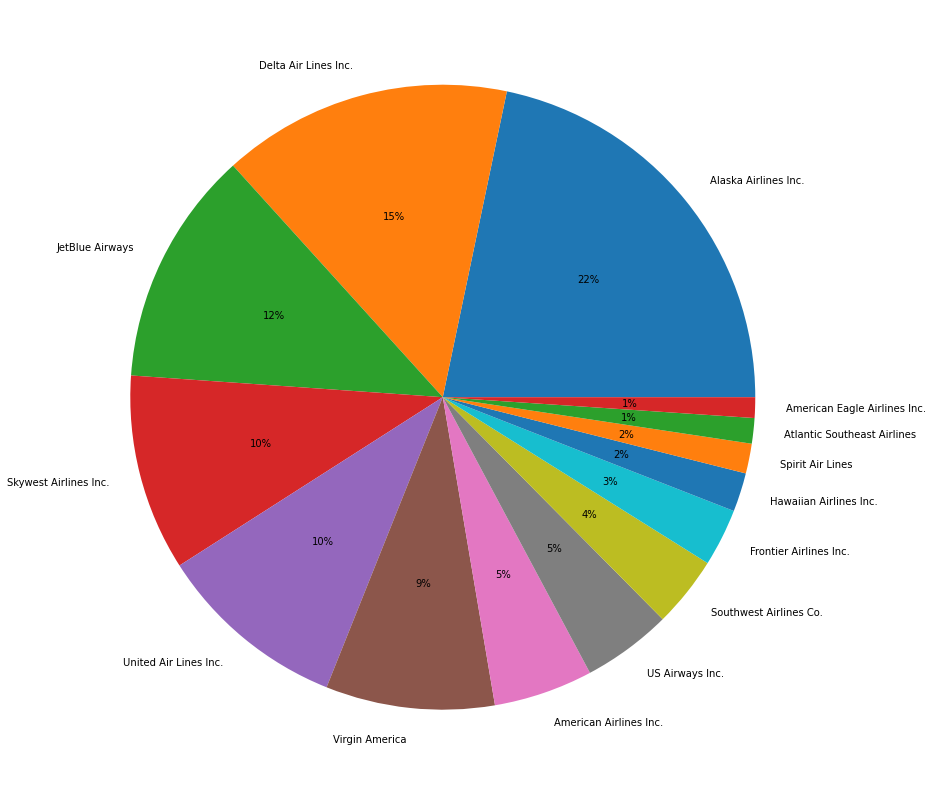

In [54]:
# check how many flights in each company
f, ax = plt.subplots(figsize=(14,18))
airline_name = flight['airline'].unique()
size = flight['airline'].value_counts()

plt.pie(size, labels=airline_name, autopct='%1.0f%%')
plt.show()

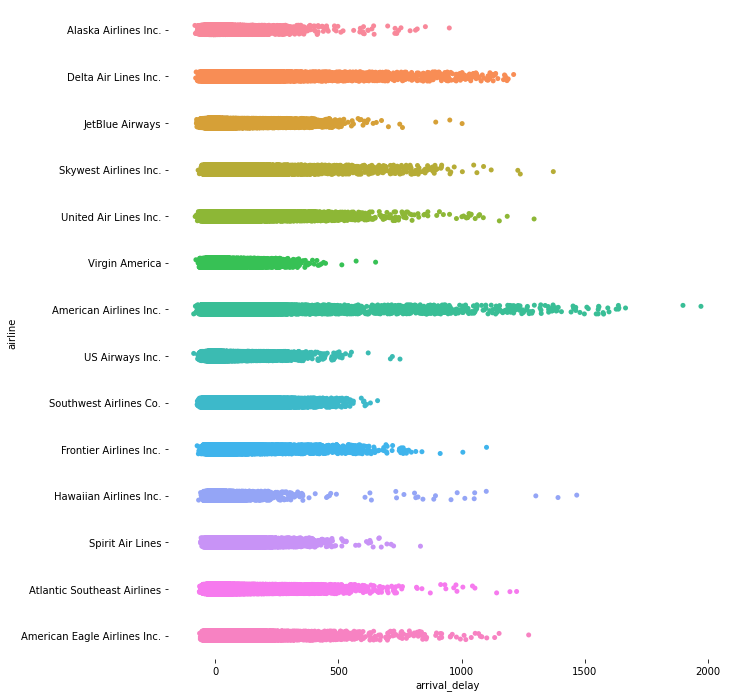

In [55]:
# check arrival delays by airlines
f, ax = plt.subplots(figsize=(10,12))
sns.despine(bottom=True, left=True)
sns.stripplot(x='arrival_delay', y='airline',
             data=flight, dodge=True, jitter=True)
plt.show()

In [56]:
# group arrival delay total time by airlines
flight_arrival_total_time = flight.groupby('airline',as_index=False)['arrival_delay'].agg('sum').rename(columns={'arrival_delay': 'total_time_arrival_delay'})
# group arrival delay count by airlines
flight_arrival_total_count = flight.groupby('airline',as_index=False)['arrival_delay'].agg('count').rename(columns={'arrival_delay': 'count_arrival_delay'})
# merge two together
flight_merge = flight_arrival_total_time.merge(flight_arrival_total_count, 
                                              left_on='airline',right_on='airline',
                                              how='inner')
# add average delay per airline
flight_merge.loc[:, 'avg_delay'] = flight_merge['total_time_arrival_delay'] / flight_merge['count_arrival_delay']

# sort values
flight_merge.sort_values('total_time_arrival_delay', ascending=False)

,airline,total_time_arrival_delay,count_arrival_delay,avg_delay
9,Southwest Airlines Co.,5500557.0,1152731,4.771761
3,Atlantic Southeast Airlines,3548236.0,524825,6.760798
8,Skywest Airlines Inc.,3286960.0,539441,6.093271
12,United Air Lines Inc.,2870162.0,463778,6.188655
1,American Airlines Inc.,2504976.0,646583,3.874175
2,American Eagle Airlines Inc.,1881302.0,272602,6.901277
7,JetBlue Airways,1669954.0,245135,6.812385
10,Spirit Air Lines,1591094.0,106608,14.924715
5,Frontier Airlines Inc.,1124311.0,81908,13.726510
11,US Airways Inc.,719831.0,194825,3.694757


- We can see Southwest Airlines has the highest total delayed arrvial in terms of time and numbers.
- Spirit Air Lines ranks the top on average time per delay.
- American Airlines is the top third airline in terms of number of delays.
- Alaska Airlines has the least total delayed time and average time per delay (remember Alaska has the most records in our dataset yet it has the least arrival time delays).

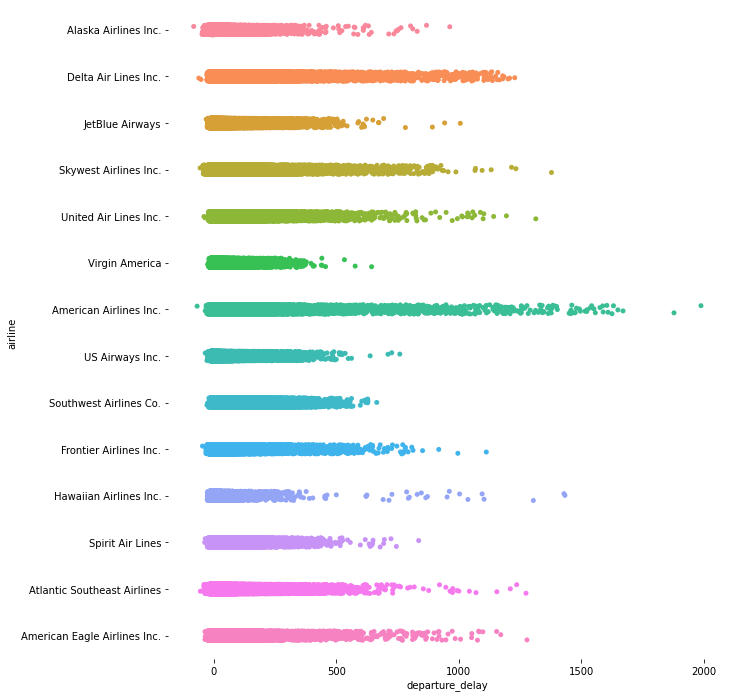

In [57]:
# check departure delays by airlines
f, ax = plt.subplots(figsize=(10,12))
sns.despine(bottom=True, left=True)
sns.stripplot(x='departure_delay', y='airline',
             data=flight, dodge=True, jitter=True)
plt.show()

- American Airlines seem to have the most departure delayed time, followed by Delta Air Lines
- Virgin America seems to have the least departure delayed time

In [58]:
# group departure delay total time by airlines
flight_depart_total_time = flight.groupby('airline',as_index=False)['departure_delay'].agg('sum').rename(columns={'departure_delay': 'total_time_depart_delay'})
# group arrival delay count by airlines
flight_depart_total_count = flight.groupby('airline',as_index=False)['departure_delay'].agg('count').rename(columns={'departure_delay': 'count_depart_delay'})
# merge two together
flight_depart_merge = flight_depart_total_time.merge(flight_depart_total_count, 
                                              left_on='airline',right_on='airline',
                                              how='inner')
# add average time per delay
flight_depart_merge.loc[:, 'avg_delay'] = flight_depart_merge['total_time_depart_delay'] / flight_depart_merge['count_depart_delay']

# sort values by total time delays
flight_depart_merge.sort_values('total_time_depart_delay', ascending=False)

,airline,total_time_depart_delay,count_depart_delay,avg_delay
9,Southwest Airlines Co.,12532530.0,1152731,10.872033
12,United Air Lines Inc.,7017425.0,463778,15.131000
4,Delta Air Lines Inc.,6157918.0,796532,7.730911
1,American Airlines Inc.,5962452.0,646583,9.221480
3,Atlantic Southeast Airlines,4639795.0,524825,8.840652
8,Skywest Airlines Inc.,4340148.0,539441,8.045640
7,JetBlue Airways,2851368.0,245135,11.631827
2,American Eagle Airlines Inc.,2762785.0,272602,10.134867
10,Spirit Air Lines,1748583.0,106608,16.401987
11,US Airways Inc.,1196447.0,194825,6.141137


- Southwest Airlines again has the highest total time of departure delays and numbers of departure delays
- American Airlines ranks the 4th on total time of departure delays
- Spirit Air Lines again is the top on average time per delay
- Hawaiian Airlines has the least total delayed time and average time per delay

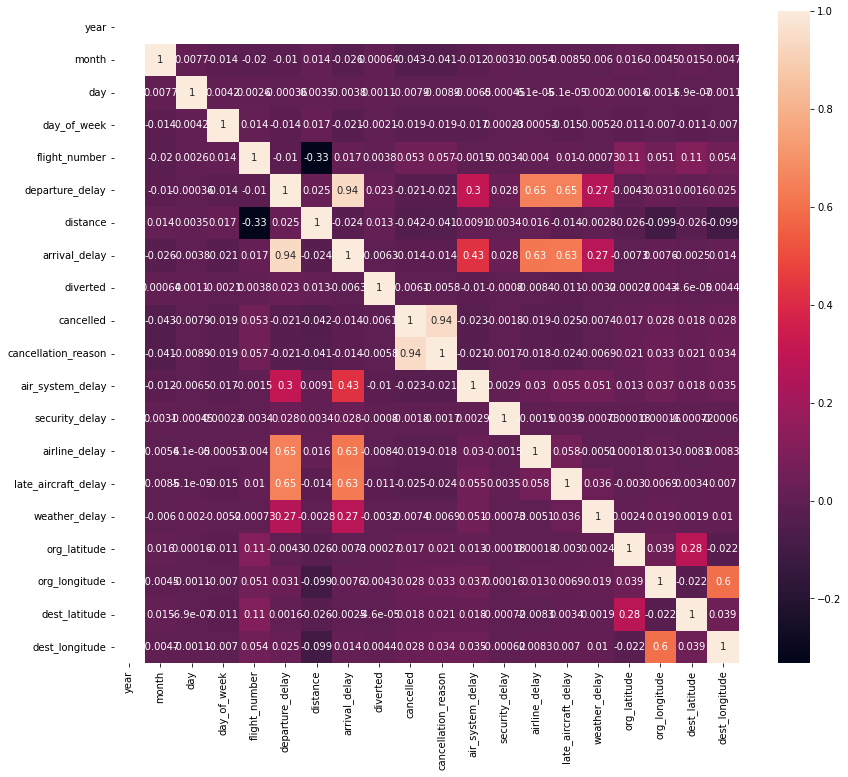

In [59]:
# take a look at some correlations
f, ax = plt.subplots(figsize=(14,12))
sns.heatmap(flight.corr(), annot=True)
plt.show()

- Evident positive correlations between arrival_delay and: 
    - departure_delay (0.94)
    - airline_delay (0.63)
    - late_aircraft_delay (0.63)
    - air_sytem_delay (0.43)
    - weather_delay (0.27)

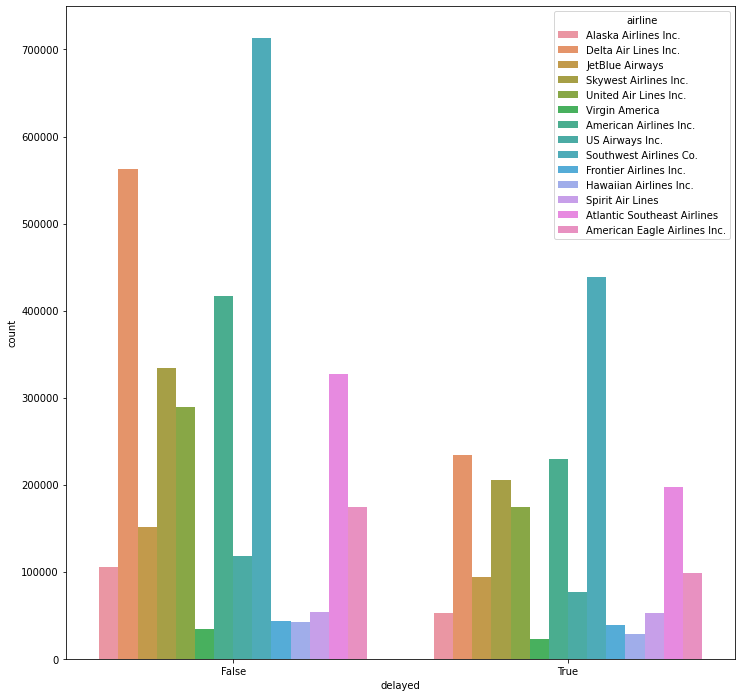

In [60]:
# check delayed flights
flight['delayed'] = flight.loc[:, 'arrival_delay'].values > 0
f, ax = plt.subplots(figsize=(12,12))
sns.countplot(x='delayed', data=flight, hue='airline')
plt.show()

In [61]:
# save the EDA data
from pathlib import Path
datapath = Path('/Users/bq/Desktop/Bootcamp/coding/Springboard/Capstone3/data/flights_EDA2.csv')
flight.to_csv(datapath)

In [104]:
# Please see Tableau workbook for more visualizations

# Feature Engineering

In [62]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate

In [63]:
# check range of columns in interest
flight[cancel_delay].describe().T

,count,mean,std,min,25%,50%,75%,max
cancellation_reason,5309350.0,0.026461,0.237582,0.0,0.0,0.0,0.0,4.0
air_system_delay,5309350.0,2.545660,13.289199,0.0,0.0,0.0,0.0,1134.0
airline_delay,5309350.0,3.567368,22.065970,0.0,0.0,0.0,0.0,1971.0
weather_delay,5309350.0,0.561896,9.021254,0.0,0.0,0.0,0.0,1211.0
late_aircraft_delay,5309350.0,4.470014,20.981696,0.0,0.0,0.0,0.0,1331.0
security_delay,5309350.0,0.014669,0.948045,0.0,0.0,0.0,0.0,573.0
arrival_delay,5309350.0,4.809638,39.465269,-87.0,-13.0,-4.0,8.0,1971.0
departure_delay,5309350.0,9.650381,37.363405,-82.0,-5.0,-1.0,8.0,1988.0


(array([5.29572e+05, 2.20500e+03, 1.19000e+02, 2.70000e+01, 5.00000e+00]),
 array([1.000e+00, 2.276e+02, 4.542e+02, 6.808e+02, 9.074e+02, 1.134e+03]),
 <BarContainer object of 5 artists>)

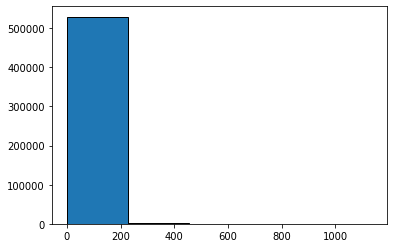

In [64]:
# check distributions of these columns
air_sys_delay = flight[flight.loc[:, 'air_system_delay'].values > 0]['air_system_delay']
plt.hist(air_sys_delay, edgecolor='black',bins=5)

(array([6.1235e+04, 1.0500e+03, 1.3700e+02, 4.7000e+01, 1.9000e+01]),
 array([1.000e+00, 2.430e+02, 4.850e+02, 7.270e+02, 9.690e+02, 1.211e+03]),
 <BarContainer object of 5 artists>)

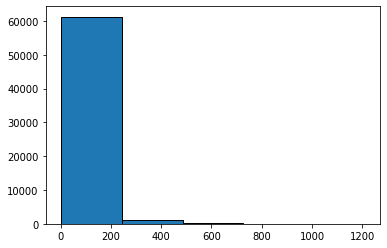

In [65]:
weather_delay = flight[flight.loc[:, 'weather_delay'].values > 0]['weather_delay']
plt.hist(weather_delay, edgecolor='black',bins=5)

(array([1.938595e+06, 3.677000e+03, 5.120000e+02, 8.900000e+01,
        9.000000e+00]),
 array([1.000e+00, 3.950e+02, 7.890e+02, 1.183e+03, 1.577e+03, 1.971e+03]),
 <BarContainer object of 5 artists>)

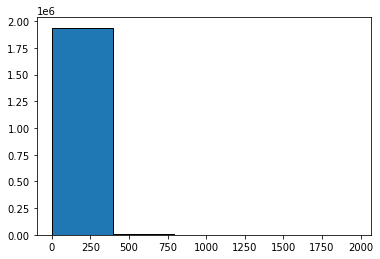

In [66]:
arrival_delay = flight[flight.loc[:, 'arrival_delay'].values > 0]['arrival_delay']
plt.hist(arrival_delay, edgecolor='black',bins=5)

Since all of these columns are not normally distributed, we will do a minmax scaler

In [67]:
# set up standardization
minmax = MinMaxScaler()
# scale the data
flight['air_system_delay'] = minmax.fit_transform(flight[['air_system_delay']])
flight['airline_delay'] = minmax.fit_transform(flight[['airline_delay']])
flight['weather_delay'] = minmax.fit_transform(flight[['weather_delay']])
flight['late_aircraft_delay'] = minmax.fit_transform(flight[['late_aircraft_delay']])
flight['security_delay'] = minmax.fit_transform(flight[['security_delay']])
flight['arrival_delay'] = minmax.fit_transform(flight[['arrival_delay']])
flight['departure_delay'] = minmax.fit_transform(flight[['departure_delay']])

flight[cancel_delay].head(15)

,cancellation_reason,air_system_delay,airline_delay,weather_delay,late_aircraft_delay,security_delay,arrival_delay,departure_delay
0,0,0.0,0.0,0.0,0.0,0.0,0.031584,0.034300
1,0,0.0,0.0,0.0,0.0,0.0,0.035471,0.037681
2,1,0.0,0.0,0.0,0.0,0.0,0.042274,0.039614
3,0,0.0,0.0,0.0,0.0,0.0,0.025267,0.032367
4,0,0.0,0.0,0.0,0.0,0.0,0.036443,0.034300
5,0,0.0,0.0,0.0,0.0,0.0,0.035471,0.035749
6,0,0.0,0.0,0.0,0.0,0.0,0.034985,0.036232
7,0,0.0,0.0,0.0,0.0,0.0,0.037901,0.035749
8,0,0.0,0.0,0.0,0.0,0.0,0.037415,0.034783
9,0,0.0,0.0,0.0,0.0,0.0,0.034014,0.036715


In [68]:
# convert our target column to 0 and 1
flight['delayed'] = flight['delayed'].astype(int)

In [69]:
flight.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5309350.0,2015.000000,0.000000,2015.00000,2015.000000,2015.00000,2015.000000,2015.00000
month,5309350.0,6.211740,3.382670,1.00000,3.000000,6.00000,9.000000,12.00000
day,5309350.0,15.686665,8.772297,1.00000,8.000000,16.00000,23.000000,31.00000
day_of_week,5309350.0,3.920797,1.993115,1.00000,2.000000,4.00000,6.000000,7.00000
flight_number,5309350.0,2180.763228,1762.240239,1.00000,731.000000,1691.00000,3257.000000,9855.00000
departure_delay,5309350.0,0.044276,0.018050,0.00000,0.037198,0.03913,0.043478,1.00000
distance,5309350.0,823.181165,607.775872,21.00000,373.000000,650.00000,1065.000000,4983.00000
arrival_delay,5309350.0,0.044611,0.019177,0.00000,0.035957,0.04033,0.046161,1.00000
diverted,5309350.0,0.002699,0.051878,0.00000,0.000000,0.00000,0.000000,1.00000
cancelled,5309350.0,0.013753,0.116466,0.00000,0.000000,0.00000,0.000000,1.00000


(array([3.853685e+06, 1.114506e+06, 3.323010e+05, 5.693000e+03,
        3.165000e+03]),
 array([  21. , 1013.4, 2005.8, 2998.2, 3990.6, 4983. ]),
 <BarContainer object of 5 artists>)

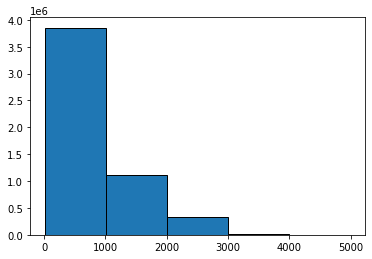

In [70]:
# scale 'distance', 'year', 'month', 'day', 'day_of_week'
plt.hist(flight['distance'], edgecolor='black',bins=5)

Not normally distributed

(array([1393302.,  979095., 1020395.,  972569.,  943989.]),
 array([ 1. ,  3.2,  5.4,  7.6,  9.8, 12. ]),
 <BarContainer object of 5 artists>)

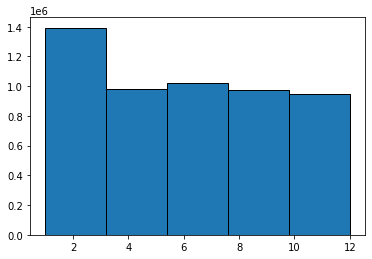

In [71]:
plt.hist(flight['month'], edgecolor='black',bins=5)

(array([1047795., 1048259., 1056572., 1050539., 1106185.]),
 array([ 1.,  7., 13., 19., 25., 31.]),
 <BarContainer object of 5 artists>)

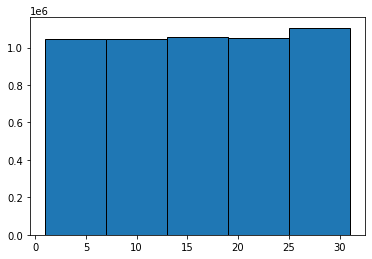

In [72]:
plt.hist(flight['day'], edgecolor='black',bins=5)

Normally distributed

(array([794203., 776529., 787777., 786430., 777429., 635450., 751532.]),
 array([1.        , 1.85714286, 2.71428571, 3.57142857, 4.42857143,
        5.28571429, 6.14285714, 7.        ]),
 <BarContainer object of 7 artists>)

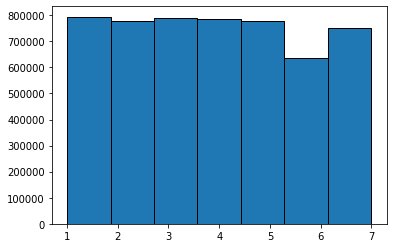

In [73]:
plt.hist(flight['day_of_week'], edgecolor='black',bins=7)

Normally distributed

In [74]:
# make the scale
minmax = MinMaxScaler()
sscaler = StandardScaler()
# scale the data
flight['distance'] = minmax.fit_transform(flight[['distance']])
flight['month'] = sscaler.fit_transform(flight[['month']])
flight['day'] = sscaler.fit_transform(flight[['day']])
flight['day_of_week'] = sscaler.fit_transform(flight[['day_of_week']])

In [75]:
# create predictors
predictor_list = ['month','day','day_of_week',
                 'distance','air_system_delay','airline_delay',
                 'weather_delay','late_aircraft_delay',
                 'departure_delay','security_delay']

In [76]:
# use ANOVA test for numerical features
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
features = flight.loc[:, predictor_list]
target = flight.loc[:, ['delayed']]

best = SelectKBest(score_func = f_classif, k='all')
model = best.fit(features, target)

scores = pd.DataFrame(data=model.scores_,
                     columns=['ANOVA Score'],
                     index=list(features.columns))

scores.sort_values(by=['ANOVA Score'], ascending=False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ANOVA Score
departure_delay,1.196167e+06
late_aircraft_delay,4.531880e+05
air_system_delay,3.604978e+05
airline_delay,2.518527e+05
weather_delay,3.593162e+04
month,7.853379e+03
security_delay,2.203350e+03
day_of_week,1.209297e+03
day,2.191116e+02
distance,2.061027e+01


'distance' seems not important to predict arrival delays.

In [77]:
predictor_list_final = ['month','day','day_of_week',
                 'air_system_delay','airline_delay',
                 'weather_delay','late_aircraft_delay',
                 'departure_delay','security_delay']

In [78]:
# since the dataset is huge, draw a sample of the dataset for modeling
flight_sample = flight.sample(n=50000)

In [79]:
# split training and testing data
X = flight_sample[predictor_list_final]
y = flight_sample['delayed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=123)

In [80]:
print(X.shape, y.shape)
print(X_train.shape, y_train.shape)

(50000, 9) (50000,)
(40000, 9) (40000,)


In [81]:
# save the final data file to csv
from pathlib import Path
datapath = Path('/Users/bq/Desktop/Bootcamp/coding/Springboard/Capstone3/data/flights_final2.csv')
flight.to_csv(datapath)

# Modeling

In [82]:
# load packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

Since it is a classification problem (predicting if there is an arrival delay), I will include the following models:

- K-Nearest Neighbor (KNN)
- Logistic Regression
- Random Forest
- Support Vector Machine (SVM)
- Naive Bayes
- Gradient Boosting

#### Train models

In [84]:
# Import all model packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier

In [85]:
# Build a pipeline to fit all models
# We use default parameters for all models at first
model_pipe = [] # create an empty list to store all models

model_pipe.append(KNeighborsClassifier()) # knn
model_pipe.append(LogisticRegression(solver='liblinear')) # logistic regression
model_pipe.append(RandomForestClassifier()) # random forest
model_pipe.append(SVC()) # svc
model_pipe.append(GaussianNB()) # naive bayes
model_pipe.append(GradientBoostingClassifier()) # gradient boosting

In [86]:
# Build a pipeline for model evaluation
# We will use Accuracy, Cross-Validation, AUC, and Confusion Matrix

acc_score = []
cv_score = []
auc_score = []
cm_score = []

for model in model_pipe:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))
    kf = KFold(n_splits=6, shuffle=True, random_state=123)
    cv_score.append(np.mean(cross_val_score(model,X_train,y_train, cv=kf)))
    auc_score.append(roc_auc_score(y_test, y_pred))
    cm_score.append(confusion_matrix(y_test, y_pred))

In [87]:
# Train the model to get ROC and AUC results
table = pd.DataFrame(columns=['classifiers','fpr','tpr','auc'])

for m in model_pipe:
    model = m.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    fpr, tpr, _ = roc_curve(y_test, ypred)
    auc = roc_auc_score(y_test, ypred)
    
    table = table.append({'classifiers': m.__class__.__name__,
                        'fpr': fpr,
                        'tpr': tpr,
                        'auc': auc}, ignore_index=True)
    
table.set_index('classifiers', inplace=True)

/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_86386/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'classifiers': m.__class__.__name__,
/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_86386/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'classifiers': m.__class__.__name__,
/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_86386/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  table = table.append({'classifiers': m.__class__.__name__,
/var/folders/5r/zswwxscs1fg2xzmhnbhxqjx00000gn/T/ipykernel_86386/134960289.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a 

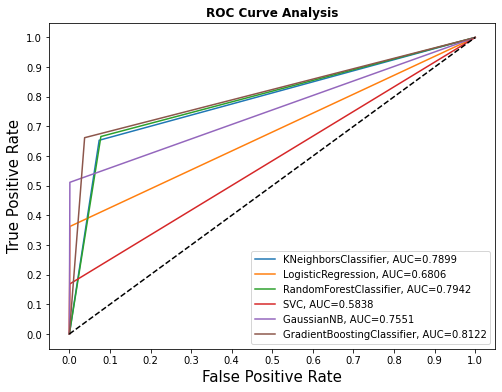

In [88]:
# Plot ROC curves
fig = plt.figure(figsize=(8,6))

for i in table.index:
    plt.plot(table.loc[i]['fpr'],
            table.loc[i]['tpr'],
            label='{}, AUC={:.4f}'.format(i, table.loc[i]['auc']))
plt.plot([0,1],[0,1], color='black', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel('False Positive Rate', fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel('True Positive Rate', fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold')
plt.legend(loc='lower right')

plt.show()

- Random Forest and Gradient Boosting are both excellent discrimination
- KNN and Naive Bayes are acceptable discrimination

In [89]:
# Now we can see how each model performs
model_list = ['KNN', 'Logistic Regression', 'Random Forest',
             'SVC', 'Naive Bayes', 'Gradient Boosting']
evaluation_df = pd.DataFrame({'Model': model_list, 
                              'Accuracy': acc_score,
                              'CV': cv_score,
                             'AUC': auc_score})
evaluation_df

,Model,Accuracy,CV,AUC
0,KNN,0.8256,0.822275,0.789941
1,Logistic Regression,0.7636,0.758875,0.680612
2,Random Forest,0.8291,0.826550,0.795125
3,SVC,0.6922,0.690700,0.583827
4,Naive Bayes,0.8187,0.819725,0.755117
5,Gradient Boosting,0.8514,0.852400,0.812193


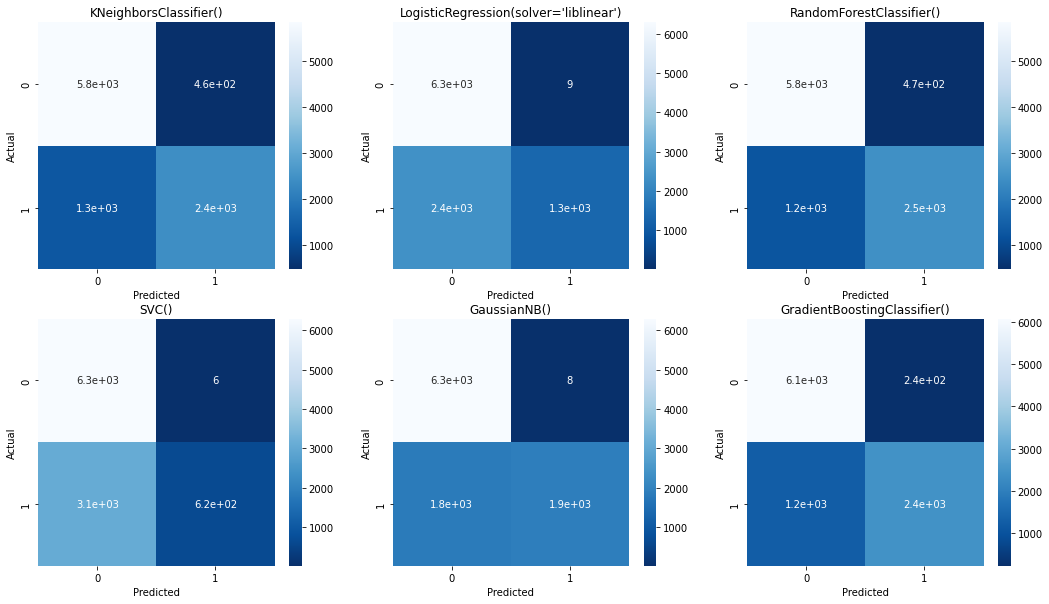

In [90]:
# create a confusion matrix for the results
fig = plt.figure(figsize=(18,10))

for i in range(len(cm_score)):
    cm = cm_score[i]
    model = model_pipe[i]
    sub = fig.add_subplot(2,3,i+1).set_title(model)
    _ = sns.heatmap(cm, annot=True,cmap='Blues_r')
    _.set_xlabel('Predicted')
    _.set_ylabel('Actual')

- Gradient Boosting has highest accuracy and AUC score, followed by Random Forest
- KNN and Naive Bayes are not as good but still acceptable

#### Hyperparameter Tuning

Lets do hyperparameter tuning on Gradient Boosting, Random Forest, and KNN

In [92]:
# Random Forest

In [93]:
# Apply Gridsearch CV for Random Forest
rf = RandomForestClassifier(random_state=123)
params = {'n_estimators': [10, 50, 100, 200],
             'max_depth': [4,6,8],
             'criterion': ['gini','entropy'],
       }
cv_rf = GridSearchCV(estimator=rf, param_grid=params, cv=5)
cv_rf.fit(X_train, y_train)

print(cv_rf.best_estimator_)
print(cv_rf.best_score_)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=200,
                       random_state=123)
0.8529500000000001


In [94]:
# Train our data with optimized random forest model
rf = RandomForestClassifier(n_estimators=50,
                            max_depth=6,
                            random_state=123)
rf.fit(X_train, y_train)
ypred = rf.predict(X_test)
acc = accuracy_score(y_test, ypred)
print(f'Accuracy score for optimized random forest model: {acc}')
print('\n')
print(classification_report(y_test, ypred))

Accuracy score for optimized random forest model: 0.8513


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6305
           1       0.91      0.66      0.77      3695

    accuracy                           0.85     10000
   macro avg       0.87      0.81      0.83     10000
weighted avg       0.86      0.85      0.84     10000



In [95]:
# Feature importance of optimized random forest
imp = pd.Series(rf.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

departure_delay        0.615592
air_system_delay       0.188908
late_aircraft_delay    0.093314
airline_delay          0.093206
weather_delay          0.006083
month                  0.001344
day_of_week            0.000712
day                    0.000675
security_delay         0.000166
dtype: float64


- Departure delay is the most predicting feature of arrival delay
- Air system delay is the second most important factor for arrival delay
- Weather, month, day, day of week are not important when predicting arrival delays

In [96]:
# Gradient Boosting

In [97]:
# Apply Gridsearch CV for Gradient Boost
gb = GradientBoostingClassifier(random_state=123)
params = {'n_estimators': [10, 50, 100, 200],
          'learning_rate': [0.1, 0.05],
          'max_depth': [4,8]}
cv_gb = GridSearchCV(estimator=gb, param_grid=params, cv=5)
cv_gb.fit(X_train, y_train)

print(cv_gb.best_estimator_)
print(cv_gb.best_score_)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, random_state=123)
0.8525


In [98]:
# Train our data with optimized gradient boosting model
gb = GradientBoostingClassifier(max_depth=4,
                           n_estimators=200,
                           random_state=123)
gb.fit(X_train, y_train)
ypred = gb.predict(X_test)
acc = accuracy_score(y_test, ypred)
print(f'Accuracy score for optimized gradient boosting model: {acc}')
print('\n')
print(classification_report(y_test, ypred))

Accuracy score for optimized gradient boosting model: 0.8522


              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6305
           1       0.91      0.66      0.77      3695

    accuracy                           0.85     10000
   macro avg       0.87      0.81      0.83     10000
weighted avg       0.86      0.85      0.85     10000



In [99]:
# Feature importance of optimized gradient boosting model
imp = pd.Series(gb.feature_importances_, index=X.columns)
imp = imp.sort_values(ascending=False)
print(imp)

departure_delay        0.802291
air_system_delay       0.174020
airline_delay          0.006631
month                  0.004654
day                    0.004395
late_aircraft_delay    0.004259
day_of_week            0.002788
weather_delay          0.000912
security_delay         0.000051
dtype: float64


- Departure delay is the most predicting feature of arrival delay
- air system delay and airline delay are equally important
- Weather, month, day, day of week are not important when predicting arrival delays

In [100]:
# KNN

In [101]:
# Apply Gridsearch CV for KNN
knn = KNeighborsClassifier()
params = {
         'n_neighbors': list(range(1, 30)),
         'weights': ['uniform', 'distance'],
         'metric': ['minkowski','euclidean','manhattan']}
cv_knn = GridSearchCV(estimator=knn, param_grid=params, cv=5)
cv_knn.fit(X_train, y_train)

print(cv_knn.best_estimator_)
print(cv_knn.best_score_)

KNeighborsClassifier(n_neighbors=7)
0.8243500000000001


In [102]:
# Train our data with optimized KNN model
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
acc = accuracy_score(y_test, ypred)
print(f'Accuracy score for optimized knn model: {acc}')
print('\n')
print(classification_report(y_test, ypred))

Accuracy score for optimized knn model: 0.8303


              precision    recall  f1-score   support

           0       0.82      0.94      0.88      6305
           1       0.87      0.64      0.74      3695

    accuracy                           0.83     10000
   macro avg       0.84      0.79      0.81     10000
weighted avg       0.84      0.83      0.82     10000



#### Conclusion

- We can see that departure delay is the leading factor for U.S. airlines arrival delay in 2015
- It is also clear that weather, month, day, day of week are not that important when predicting arrival delays
- Departure delay would directly make airlines stay on air for more time, and thus consuming more fuel, leading to an extra cost of the company
- In order to cut the fuel cost and increase revenue, U.S. Department of Transportation (DOT) should focus on making measures to reduce the departure delay
- To be specific, DOT should pay more attention to Southwest Airlines, which has the highest total departure delay time, arrival delay time, and the number of departure and arrival delays
- In the mean time, DOT coud also consider how to handle delay caused by air system, as it is the second top reason causing arrival delay